In [ ]:
#Titanic Survival Dataset

# STEPS
1. Import libraries
2. Import the dataset
3. Perform Data Analysis (DM, DE, DC, DV, EDA)
4. Feature Scaling
5. Feature Encoding
6. Feature Selection
7. Choosing the model - Logistic Regression
8. Split the data - CV
9. Training the model - CV
(do 8 & 9 seperately)
10. Test the model
11. Performance - Confusion Matrix


DE - Data Exploration
DC - Dta Cleaning
DV - Data Visualization

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm

Import the dataset

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Data Analysis

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Target--> Survived

In [ ]:
#SibSp-->no of sibling or spouse --with that passenger
#Parch--> no of Parent/ Children --with that passenger
#Embarked--> The embarkation port is a departure port, it is where you will join the ship at the start of your cruise holiday.
#(C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Age            177---->null
# Cabin          687---->null


<Axes: >

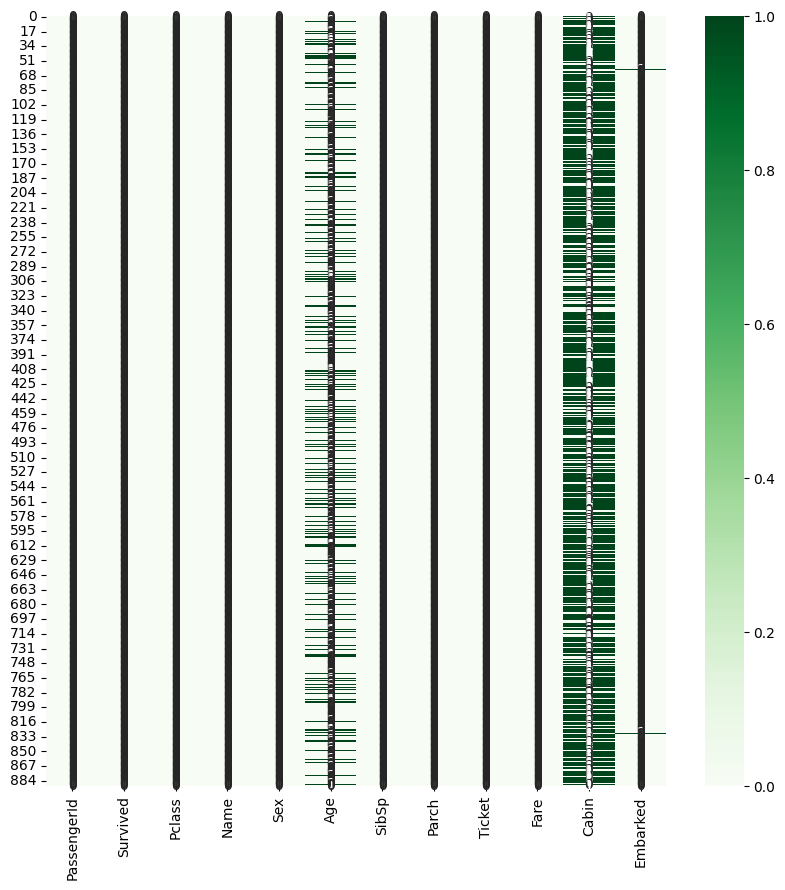

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), annot=True, cmap='Greens')

In [ ]:
#percentage of null values in Age column
((df.Age.isnull().sum() )/(len(df.Age)))*100

19.865319865319865

In [ ]:
#percentage of null values in Cabin column
((df.Cabin.isnull().sum() )/(len(df.Age)))*100

77.10437710437711

In [ ]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
print(df.Cabin.unique())
df.Cabin.nunique()

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


147

In [ ]:
#Cabin has lot of null values, the one which has null values cannot be filled by predicting, so drop it

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
#(C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
#2 Embarked values are missing, so handle it

In [ ]:
#Show the datapoints where the embark is null
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
#Trying --based on what column we can find embarked col values

In [ ]:
# Try Pclass=1
print(df.loc[df.Pclass==1, "Embarked"])
df.loc[df.Pclass==1, "Embarked"].value_counts()

1      C
3      S
6      S
11     S
23     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 216, dtype: object


S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [ ]:
# Try Pclass=2
print(df.loc[df.Pclass==2, "Embarked"])
df.loc[df.Pclass==2, "Embarked"].value_counts()

9      C
15     S
17     S
20     S
21     S
      ..
866    C
874    C
880    S
883    S
886    S
Name: Embarked, Length: 184, dtype: object


S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [ ]:
# Try Pclass=1
print(df.loc[df.Pclass==3, "Embarked"])
df.loc[df.Pclass==3, "Embarked"].value_counts()

0      S
2      S
4      S
5      Q
7      S
      ..
882    S
884    S
885    Q
888    S
890    Q
Name: Embarked, Length: 491, dtype: object


S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [ ]:
# Pclasss& Embarked
# Null Hypothesis-->No relation
# Alternate Hypothesis-->Has Relation

# Null hypothesis is true finally


In [ ]:
#Try Fare 80 has relation or not
print(df.loc[df.Fare==80, "Embarked"])
df.loc[df.Fare==80, "Embarked"].value_counts()
#nope

61     NaN
829    NaN
Name: Embarked, dtype: object


Series([], Name: Embarked, dtype: int64)

In [ ]:
#Try Ticket 113572 has relation or not
print(df.loc[df.Ticket==113572, "Embarked"])
df.loc[df.Ticket==113572, "Embarked"].value_counts()
#nope

Series([], Name: Embarked, dtype: object)


Series([], Name: Embarked, dtype: int64)

In [ ]:
#2 missing Embarked values cannot be predicted from other columns, do drop it, its just 2
#ref
# Use the loc method to filter the DataFrame
#df_new = df.loc[df['age'] <= 30]
#Drop the rows where Ebbark is
# i=df.Embarked[df.Embarked=='nan']
# df1=df.drop(df.iloc[df.Embarked.isnull()])

In [ ]:
df.shape

(891, 11)

In [ ]:
#Handle Age col
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
#Mean of Age column
mean=np.mean(df.Age)
#Median of Age column
median=np.median(df.Age)
#Mode of Age column
# can do with scipy only mode=si.mode(df.Age)

In [ ]:
#Mean of Age column
mean=df.Age.mean()
#Median of Age column
median=df.Age.median()
#Mode of Age column
mode=df.Age.mode()

In [ ]:
print(mean, median, mode)

29.69911764705882 28.0 0    24.0
Name: Age, dtype: float64


In [ ]:
##########################################

In [ ]:
li=[11,12,13,14]

In [ ]:
np.mean(li)

12.5

In [ ]:
np.median(li)

12.5

In [ ]:
#add outlier 98
li=[11,12,13,14, 98]

In [ ]:
np.mean(li)

29.6

In [ ]:
np.median(li)

13.0

In [ ]:
#.'.in case of outlier mean fails, so choose 'median' to fill

<Axes: ylabel='Age'>

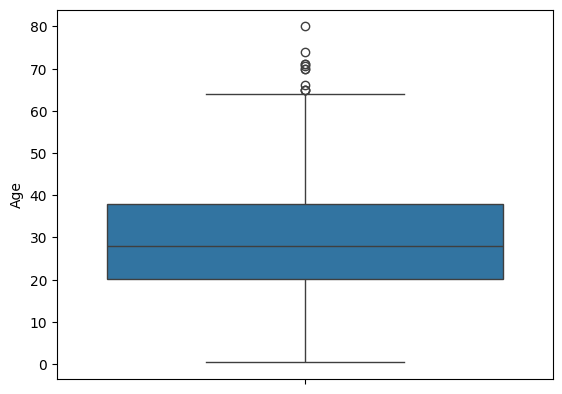

In [ ]:
#check for outliers in Age col
#plt.boxplot(df.Age)
sns.boxplot(df.Age)

<Axes: ylabel='Age'>

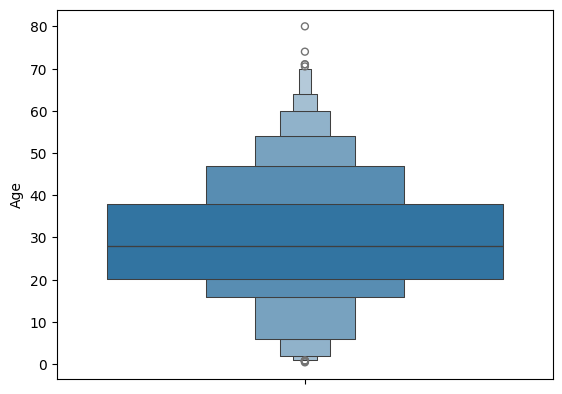

In [ ]:
sns.boxenplot(df.Age)

In [ ]:
#what values how many times repeated in df.Age
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
#fill with median in Age null values
df.Age.fillna(df.Age.median(), inplace= True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
# Drop rows where Embarked is Nan
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Select required features, delete unimportant features

In [ ]:
#Drop[PassengerId, Name, Ticket, Fare]
df.drop(['PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Plot Graph to see: dtrength of Male vs Female

<Axes: >

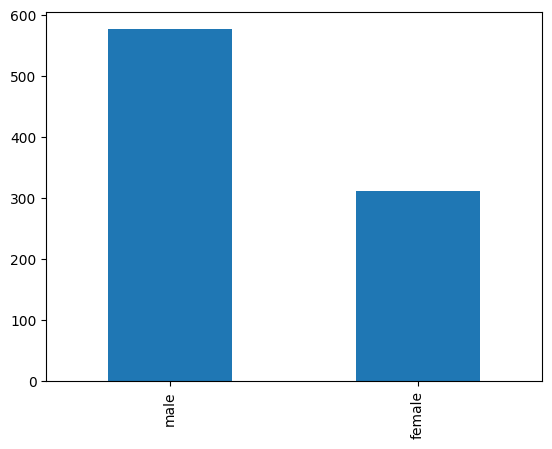

In [ ]:
df.Sex.value_counts().plot.bar(df.Sex)

<Axes: >

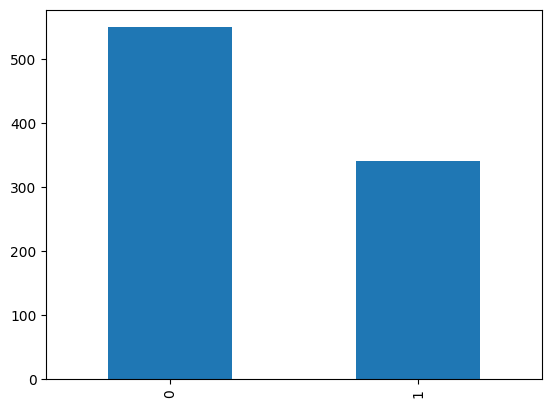

In [ ]:
#Plot Graph to see: dtrength of Survived vs Non Survived
df.Survived.value_counts().plot.bar(df.Survived)

In [ ]:
# #plot a graph to see Male: Survived vs Non Survived, Female: Survived vs Non Survived
# MS=df[(df.Sex=='male') & (df.Survived==1)]
# FS=df[(df.Sex=='female') & (df.Survived==1)]
# M_NS=df[(df.Sex=='male') & (df.Survived==0)]
# F_NS=df[(df.Sex=='male') & (df.Survived==0)]
# pl={'MS':MS,'FS':FS,'M_NS':M_NS, 'F_NS':F_NS}
# pd.DataFrame(pl)

<Axes: xlabel='Survived,Sex'>

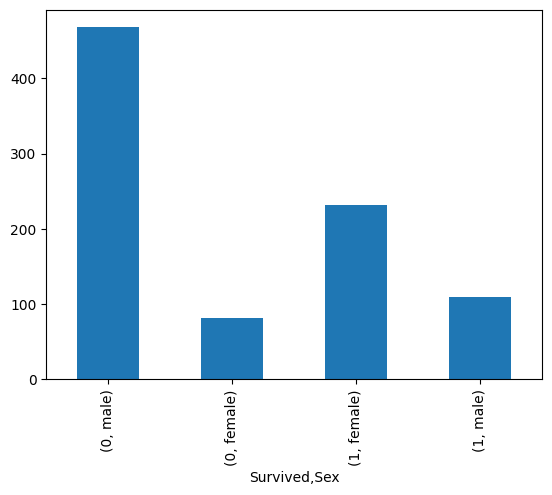

In [ ]:
#plot a graph to see Male: Survived vs Non Survived, Female: Survived vs Non Survived
df.Sex.groupby(df.Survived).value_counts().plot.bar(df.Sex)

<Axes: xlabel='Survived', ylabel='count'>

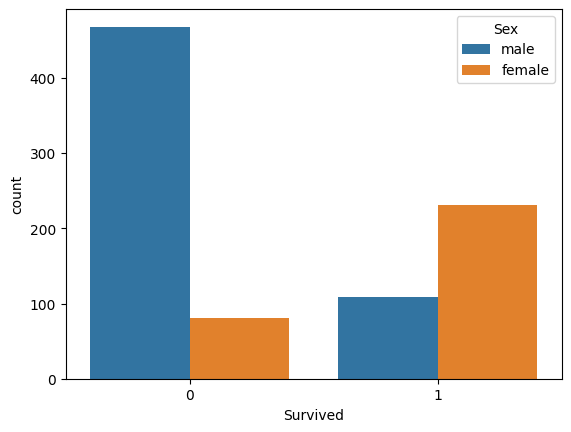

In [ ]:
#easy way-Sir
sns.countplot(x='Survived', data=df, hue='Sex')

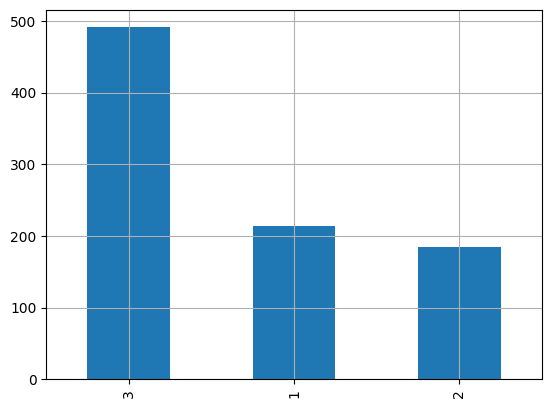

In [ ]:
# plot a graph to find out the strength of the Pclass
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

<Axes: xlabel='Survived', ylabel='count'>

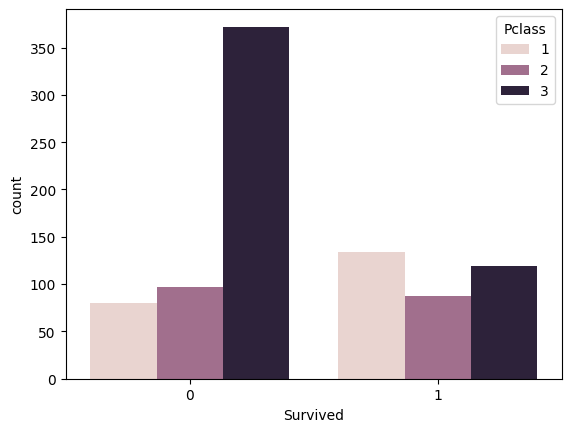

In [ ]:
#plot a graph to see Pclass1,2,3: Survived vs Non Survived
#easy way-Sir
sns.countplot(x='Survived', data=df, hue='Pclass')

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Encoding

In [ ]:
# Do Encoding in the columns--Sex, Embarked
#Sex- order does not matter, so do one hot encoder or label encoder(because only 2 classes, 0,1 in both)
#Embarked- order maders, so do label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df.Sex = enc.fit_transform(df.Sex)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df.Sex = enc.fit_transform(df.Sex)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
#Conert Age to int datatype
df.Age= df.Age.astype(int)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


In [ ]:
#Make the values in Fare -round of to 2 decimal places
df.Fare= round(df.Fare,2)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 62.5+ KB


In [ ]:
#But lets do onehot encoding itself in Embarked column

In [ ]:
Em_dummy=pd.get_dummies(df['Embarked'])

In [ ]:
df=pd.concat([df, Em_dummy], axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1


In [ ]:
#remove extras-->Embarked col, 'C' col

In [ ]:
df.drop(['Embarked','C'], axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 89.6 KB


<Axes: >

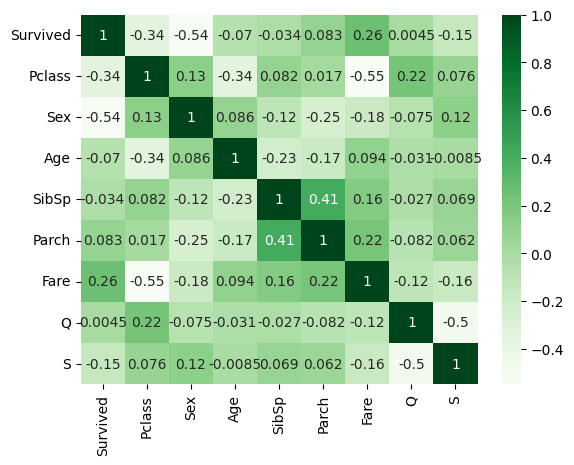

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

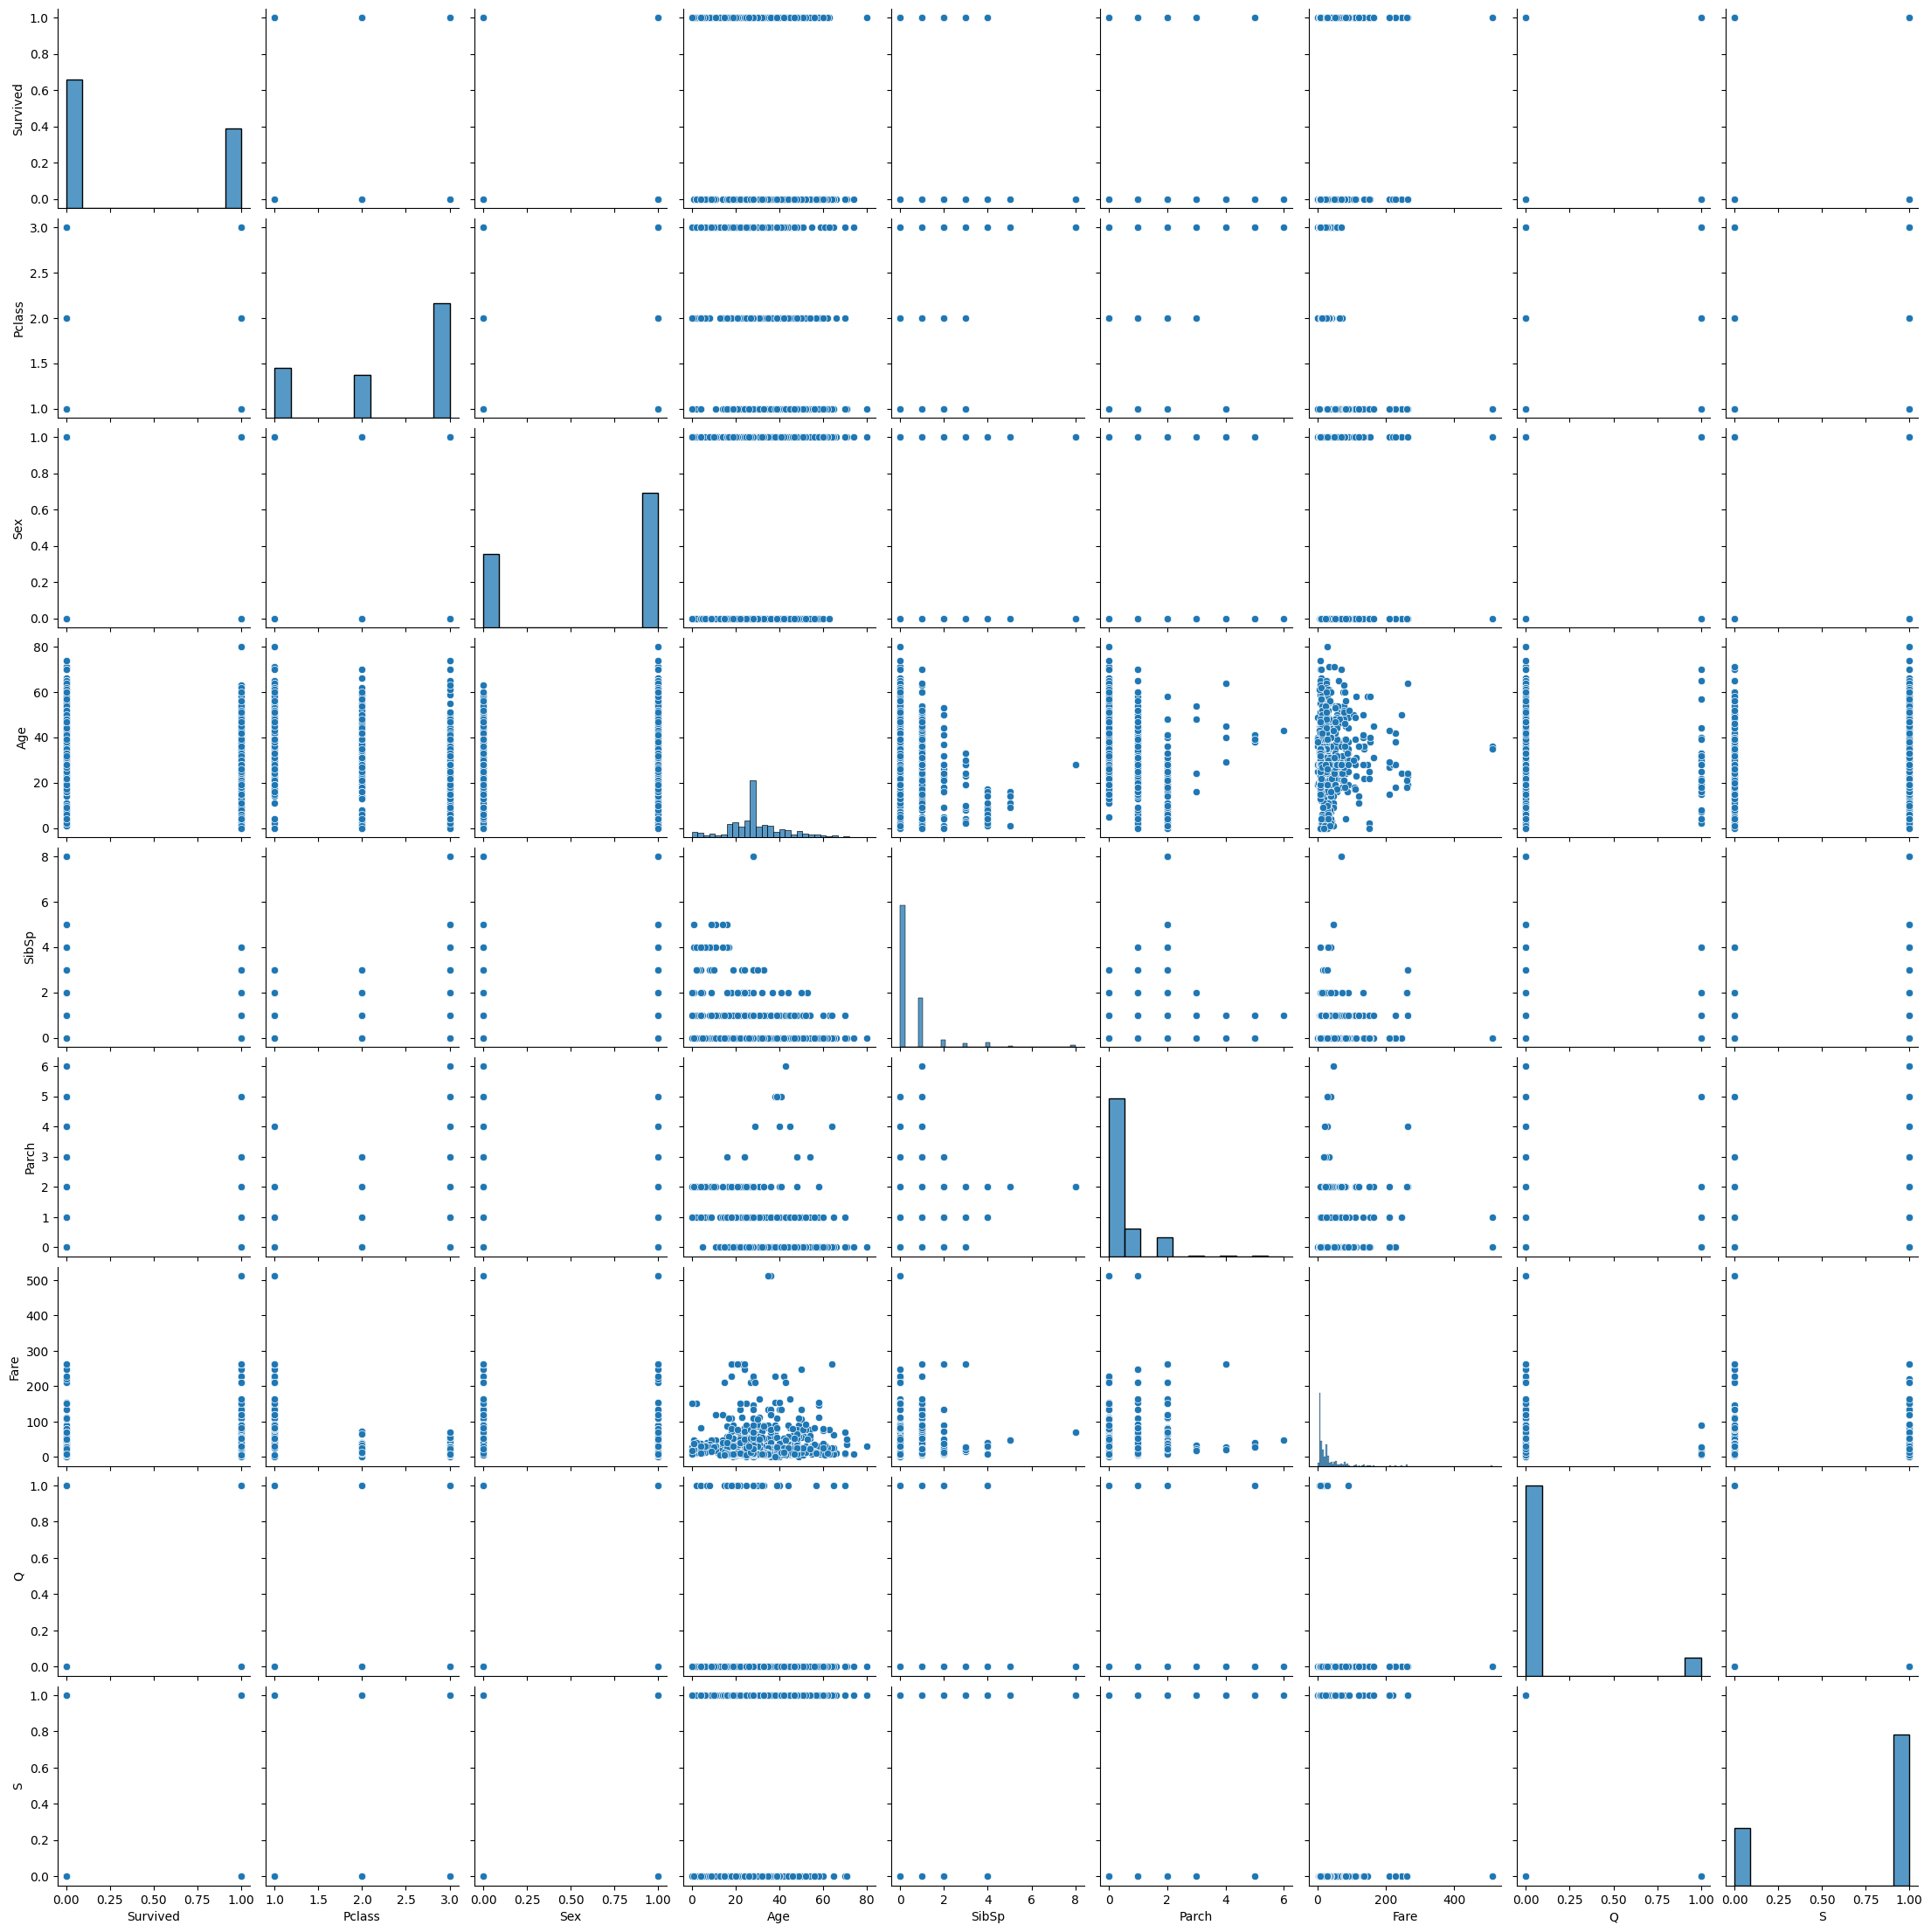

In [ ]:
sns.pairplot(df)

# Feature Importance

In [ ]:
X=df.iloc[:,1:]
y= df.iloc[:,0]

In [ ]:
###############
#see which are important and impactful features
from sklearn.ensemble import ExtraTreesClassifier
feat = ExtraTreesClassifier()
feat.fit(X,y)

ExtraTreesClassifier()

In [ ]:
feat.feature_importances_

array([0.10224806, 0.29124335, 0.2397916 , 0.04827965, 0.04234617,
       0.24629618, 0.00868294, 0.02111203])

In [ ]:
feat_imp =pd.Series(feat.feature_importances_, index=X.columns)

<Axes: >

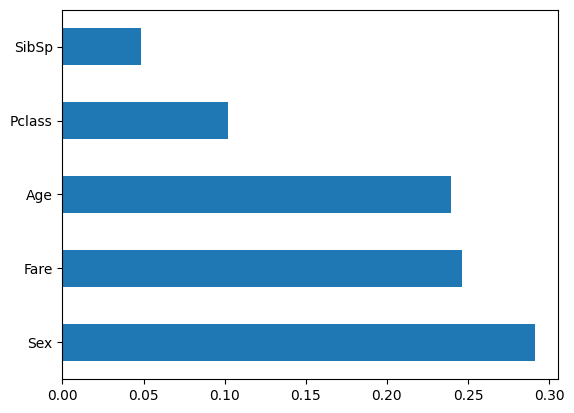

In [ ]:
#plot the first 5 top most important features
feat_imp.nlargest(5).plot(kind='barh')

# Split with CV

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [ ]:
#split
for train_index, test_index in skf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
y_test

706    1
707    1
708    1
709    1
710    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 177, dtype: int64

In [ ]:
#model selection
classifier1=LogisticRegression()

In [ ]:
classifier1.fit( X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Test
y_pred = classifier.predict(X_test)

In [ ]:
pl=pd.DataFrame({'Actual': y_test, 'Predict': y_pred})

In [ ]:
pl.head()

,Actual,Predict
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


In [ ]:
pl.Actual.corr(pl.Predict)

0.6242102403653844

<Axes: >

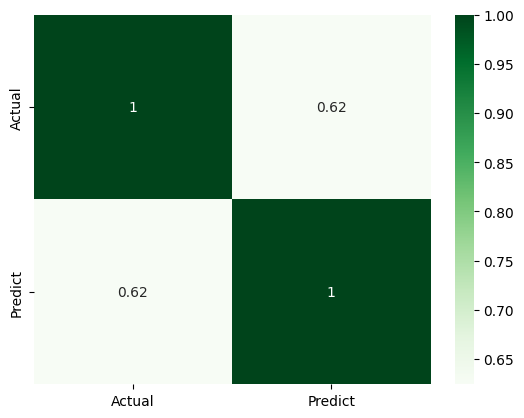

In [ ]:
sns.heatmap(pl.corr(), annot=True, cmap='Greens')

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[98, 11],
       [20, 48]])

In [ ]:
#see all metrics
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       109\n           1       0.81      0.71      0.76        68\n\n    accuracy                           0.82       177\n   macro avg       0.82      0.80      0.81       177\nweighted avg       0.82      0.82      0.82       177\n'

In [ ]:
#see accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8248587570621468

# Export model &Dataset
1. Serializing- Deserializing
2. Dumping, Undumping
3. Pickling-Unpickling
(all 3 same)
Pickle is a module

In [ ]:
import pickle
#pickling, unpickling
pick= pickle.dumps(classifier)


In [ ]:
unpick= pickle.loads(pick)

In [ ]:
classifier

LogisticRegression()